# Group Project: Nick Chu, Kayla Hayashi, Emmy Xu

# Group Contributions Statement

All three of us worked together to do the data cleaning and exploratory analysis. Kayla wrote the function for scatterplots, Emmy wrote the function for the box plot, while Nick wrote the code for the histogram. Emmy and Nick focused on the cross validation for the feature selection, and Kayla wrote the functions for the Confusion matrices. When it came to modeling, Emmy wrote the decision regions function, Kayla focused on the Logistic Regression, Emmy did the SVM, and Nick wrote the KNeighbors Classifier. We all worked together to check over the code, write the discussions, and add comments and labels to our work. 

# Data Import

First, we must import the Palmer Penguins dataset. Below, we can take a look at the first 5 rows to get an idea of what the whole dataset looks like.

In [2]:
# standard imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#reading in the data
url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)

In [3]:
# checking the first few rows of the data frame
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


# Data Cleaning

Before we can insert the data into machine learning models, we have to first clean the data and split the data into training and test sets. We first split the penguins data set into train and test, then clean the penguins data set, changing the qualitative features, sex, species, and islands, into integers instead of strings so that the machine learning algorithms will work more smoothly. 

In [4]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#separating the data into train and test sets
train, test = train_test_split(penguins, test_size = 0.2)

In [5]:
def prepData(df):
    """
    This function prepares the data by encoding qualitative columns into integers, while also 
    splitting the data into X and y and returning those values
    Parameter df is a data frame that will be used to extract data from
    """
    df = df.copy()
    le = preprocessing.LabelEncoder()
    
    #encoding columns into integers
    df["Sex"] = le.fit_transform(df["Sex"])
    df["Species"] = le.fit_transform(df["Species"])
    df["Island"] = le.fit_transform(df["Island"])
    
    #splitting data into X and y, X being all data except Species, y being species
    X = df.drop(["Species"], axis = 1)
    y = df["Species"]
    
    return(X, y)

#calling the function on the train and test sets and saving the output as variables
X_train, y_train = prepData(train)
X_test,  y_test  = prepData(test)

# Exploratory Analysis

In order to figure out which features would be most useful in predicting the species of a penguin, we must first take a look at the relationships between the different features from the dataset. Here, we look at various different combinations of features listed below in the list cols. We then make tables, scatterplots, histograms, and boxplots in order to give us a better idea of what features would be the most ideal.

In [3]:
# pre-processing just for exploratory analysis: selecting columns and dropping nan values
cols = ["Species", "Sex", "Culmen Length (mm)", "Culmen Depth (mm)", "Body Mass (g)", "Flipper Length (mm)", "Island"]
penguins = penguins[cols]
penguins = penguins[penguins.Sex != "."]
penguins = penguins.dropna()

In [4]:
def summary(group_cols, value_cols):
    """
    This function returns a summary table of the mean and standard deviation of the selected data
    Parameter group_cols is a qualitative variable from the data frame that the values will be grouped by
    Parameter value_cols is a list of strings representing column names from the data frame
    which will be used to compute the mean and standard deviation of the chosen groups
    """
    return penguins.groupby(group_cols)[value_cols].aggregate([np.mean,np.std]).round(2)

This table looks at the culmen depth and culmen length of the penguins on the three different islands.

In [65]:
# Table 1
summary(["Island"], ["Culmen Length (mm)", "Culmen Depth (mm)"])

Culmen Length (mm)       Culmen Depth (mm)      
                        mean   std              mean   std
Island                                                    
Biscoe                 45.25  4.83             15.91  1.83
Dream                  44.22  5.95             18.34  1.14
Torgersen              39.04  3.03             18.45  1.35

This table examines the body mass and flipper length of the penguins on the three different islands.

In [66]:
# Table 2
summary(["Island"], ["Body Mass (g)", "Flipper Length (mm)"])

Body Mass (g)         Flipper Length (mm)       
                   mean     std                mean    std
Island                                                    
Biscoe          4719.17  790.86              209.56  14.28
Dream           3718.90  412.94              193.19   7.43
Torgersen       3708.51  451.85              191.53   6.22

In [5]:
# figure 1: scatterplots

def scatter(p1,p2,qualitative):
    """
    This function creates a scatterplot by grouping the data by a qualitative variable, and plotting
    these values with the quantitative variables on the x and y axes
    Parameter p1 is a string representing a column name from the data frame which will be plotted on the x axis
    Parameter p2 is a string representing a column name from the data frame which will be plotted on the y axis
    Parameter qualitative is a string representing a column name which will be the qualitative variable the data 
    will be grouped by
    """
    
    qualSet = set(penguins[qualitative]) #creating a set of the elements in the qualitative column
    fig,ax = plt.subplots(1)
    
    #plot each element within the set, according to the x and y parameters
    for s in qualSet:
        sub = penguins[penguins[qualitative] == s]
        ax.scatter(sub[p1], sub[p2], label = s.split()[0], alpha = 0.5)
    
    #setting the legend and labels
    ax.legend()
    ax.set(xlabel = p1, ylabel = p2)

This scatterplot shows us that each species has its own distinct combination of culmen length and culmen depth, which is why we can see fairly distinct clusters of dots forming.

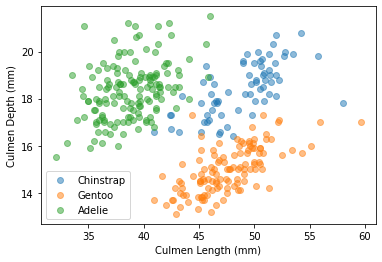

In [68]:
scatter("Culmen Length (mm)", "Culmen Depth (mm)", "Species")

This scatterplot shows us that Chinstrap and Adelie penguins both have similar body mass and culmen depths, so it may not be the best idea to use these features.

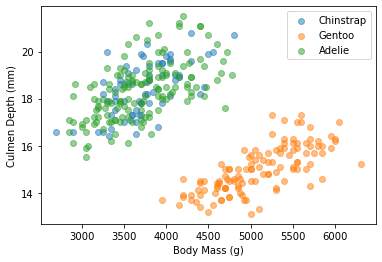

In [69]:
scatter("Body Mass (g)", "Culmen Depth (mm)", "Species")

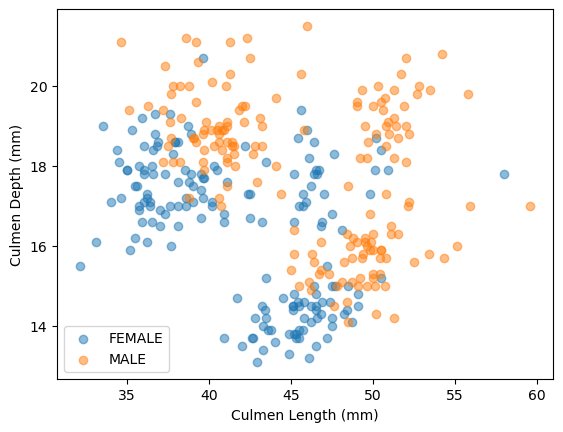

In [6]:
scatter("Culmen Length (mm)", "Culmen Depth (mm)", "Sex")

In [70]:
# figure 2: histogram

def hist(p1, p2, p3, **kwargs):
    """
    This function creates a histogram using one qualitative parameter and 2 quantitative parameters
    Parameter p1 is a string representing the name of a column, which will be plotted on the x axis
    Parameter p2 is a string representing the name of a column, which will be plotted on the y axis
    Parameter p3 is a string representing a column name which will be the qualitative variable the data 
    will be grouped by
    """
    
    fig, ax = plt.subplots(1)
    ax.set(xlabel = p1,
          ylabel = p2)
    
    subset = set(penguins[p3])# taking a set of the elements in the qualitative column
    
    #plot each qualitative group onto the histogram
    for x in subset:
        sub = penguins[penguins[p3] == x]
        sub = sub[p1].dropna()
        ax.hist(sub,
                label = x.split(" ")[0],
                **kwargs)
        
    ax.legend()

This histogram examines flipper length and body mass of penguins of different sex. We can see that males generally have higher body mass.

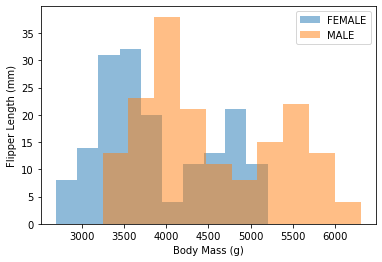

In [71]:
hist("Body Mass (g)", "Flipper Length (mm)", "Sex", alpha = 0.5)

This boxplot examines how culmen length varies among species. We see that Adelie penguins easily have the shortest culmen length, while Chinstraps are slightly ahead of Gentoos.

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Species'>

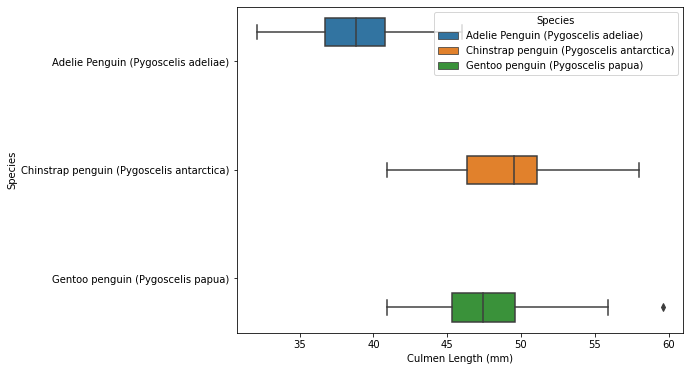

In [72]:
# figure 3: boxplot

import seaborn as sns
fig, ax = plt.subplots(figsize = (8,6))
#creating a boxplot of the 3 species' column length
sns.boxplot(data = penguins,
            x = "Culmen Length (mm)",
            y = "Species",
            hue = "Species")

# Feature Selection

Now that we have examined a good amount of different combinations of features of the penguins visually through the use of graphs and tables, we now want to select features that are backed by data. So in this section, we take a look at a very large quantity of different combinations of features (columns of the dataset) and examine their cross validation scores when using the LogisticRegression model. We choose the LogisticRegression model arbitrarily, so we could have done this section using a different model.

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def check_column_score(cols):
    '''
    This function trains and evaluates the model via crossvalidation on the columns of 
    the data set with select indeces
    Parameter cols is a list of columns from the data frame
    '''
    print("training with columns " + str(cols))

    #returning the cross validation score with a logistic regression on the training data for the selected columns
    LR = LogisticRegression(max_iter = 5000)
    return cross_val_score(LR,X_train[cols],y_train,cv=5).mean()

In [74]:
cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex',
        'Body Mass (g)', 'Flipper Length (mm)', 'Island']
#dropping nan values and preparing training data to be used for feature selection
X_train, y_train = prepData(train[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex',
        'Body Mass (g)', 'Flipper Length (mm)', 'Island', 'Species']].dropna())

In [75]:
#a list of combinations of columns
combos = [['Culmen Length (mm)', 'Culmen Depth (mm)','Sex'],
          ['Culmen Length (mm)', 'Body Mass (g)','Sex'],
          ['Culmen Length (mm)', 'Flipper Length (mm)','Sex'],
          ['Culmen Depth (mm)', 'Body Mass (g)', 'Sex'],
          ['Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex'],
          ['Flipper Length (mm)', 'Body Mass (g)', 'Sex'],
          ['Culmen Length (mm)', 'Culmen Depth (mm)','Island'],
          ['Culmen Length (mm)', 'Body Mass (g)','Island'],
          ['Culmen Length (mm)', 'Flipper Length (mm)','Island'],
          ['Culmen Depth (mm)', 'Body Mass (g)', 'Island'],
          ['Culmen Depth (mm)', 'Flipper Length (mm)', 'Island'],
          ['Flipper Length (mm)', 'Body Mass (g)', 'Island']]
          
#checking the correlation between each combinations of columns via cross validation, and printing the scores
for combo in combos:
    x = check_column_score(combo)
    print("CV score is " + str(np.round(x,3)))

training with columns ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex']
CV score is 0.989
training with columns ['Culmen Length (mm)', 'Body Mass (g)', 'Sex']
CV score is 0.974
training with columns ['Culmen Length (mm)', 'Flipper Length (mm)', 'Sex']
CV score is 0.955
training with columns ['Culmen Depth (mm)', 'Body Mass (g)', 'Sex']
CV score is 0.785
training with columns ['Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex']
CV score is 0.826
training with columns ['Flipper Length (mm)', 'Body Mass (g)', 'Sex']
CV score is 0.743
training with columns ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island']
CV score is 0.974
training with columns ['Culmen Length (mm)', 'Body Mass (g)', 'Island']
CV score is 0.962
training with columns ['Culmen Length (mm)', 'Flipper Length (mm)', 'Island']
CV score is 0.958
training with columns ['Culmen Depth (mm)', 'Body Mass (g)', 'Island']
CV score is 0.789
training with columns ['Culmen Depth (mm)', 'Flipper Length (mm)', 'Island']
CV score is 0.83



# Why we chose island, culmen length, culmen depth:

Based on our cross validation scores, we decided to use "Island" as our qualitative variable and "Culmen Length (mm)" and "Culmen Depth (mm)" as our two quantitative variables. In our feature selection, two combinations had the highest cross validation scores, indicating that they were the most highly correlated. "Culmen Length (mm)" and "Culmen Depth (mm)" were the quantitative variables for both, but the qualitative variable in first combo is "Sex", rather than "Island". Even though there are certainly sex differences across species, we chose to use "Island" to predict "Species" because we wanted to make models to visualize species differences across islands. Additionally, our third scatter plot from above uses "Sex" a the qualitative variable, and we can see that the plots are not in distinct groups, which could cause issues for future modeling. Thus, our final decision was to use "Island" as our qualitative variable and "Culmen Length (mm)" and "Culmen Depth (mm)" as our two quantitative variables.

# Modeling

Now that we have selected Island, Culmen Length, and Culmen Depth as the three features we will use to predict the species of a penguin, we will now test the effectiveness of three different machine learning models on these features. The three different models that we will use are Logistic Regression, KNeighbors Classifier, and Support Vector Machines. For each of these models, we first use a function to determine the best complexity parameter for the model by testing the cross validation score when the complexity parameter varies. After we obtain the best complexity parameter via the best cross validation score, we then take a look at the confusion matrix for the model. The confusion matrix shows us how accurate the model via the numbers on its diagonal and the numbers next to the diagonal. We then plot the decision regions of the model. This gives us a simple visual that shows us how accurate our model is at predicting species. 

In [6]:
#the final train and test sets will only hold the columns chosen from feature selection
cols = ["Culmen Length (mm)","Culmen Depth (mm)","Island"]
X_train, y_train = prepData(train[["Culmen Length (mm)", "Culmen Depth (mm)", "Island", "Species", "Sex"]].dropna())
X_test,  y_test  = prepData(test[["Culmen Length (mm)", "Culmen Depth (mm)", "Island", "Species", "Sex"]].dropna())

In [7]:
import matplotlib.patches as mpatches

def plot_regions(c,X,y):
    """
    This function plots the decision regions of the chosen model with the given data
    Parameter c is the model which will be used to fit the data
    Parameter X is the set of features that will be used to predict the type of species
    Parameter y is the data representing the species of the penguins (target data)
    """
    # fit our chosen model with our train data and target data
    c.fit(X,y)
    
    # creating new variables x0 and x1 for the two quantitative variables
    x0=X["Culmen Length (mm)"]
    x1=X["Culmen Depth (mm)"]
    
    # a dict of island names to assign them to plots as titles
    island_names = {0:"Biscoe", 1:"Dream", 2: "Torgersen"}
    # a dict of colors to assign them to the dots as colors
    color = {0:"blue", 1:"green", 2: "red"}
    # a dict of species names to assign them as legends
    species = {0:"Adelie", 1:"Chinstrap",2:"Gentoo"}

    # making two grids with the min and max of the two quantitative variables
    grid_x=np.linspace(x0.min(),x0.max(),501) 
    grid_y=np.linspace(x1.min(),x1.max(),501)  

    # create meshgrids xx and yy
    xx, yy = np.meshgrid(grid_x, grid_y)

    # transforming the grids for xx and yy into 1D arrays
    XX = xx.ravel()
    YY = yy.ravel()
    
    # make three plots on a figure, figsize = (5,12)
    fig,ax = plt.subplots(3, figsize = (5,12))
    
    # iterate through 0, 1, and 2 to loop through islands
    for i in range(3):
        # create an array of values of i with same shape as XX
        ZZ = i*np.ones(len(XX)).reshape(XX.shape)

        # an array of predictions for arrays XX, YY, and ZZ
        p = c.predict(np.c_[XX,YY,ZZ])
        # reshape the prediction array back into a meshgrid
        p = p.reshape(xx.shape)
        
        # creating a contour map of the xx and yy values
        ax[i].contourf(xx, yy, p, cmap = "jet", alpha = .2)
        
        # create a subset of X and y values for current island i
        sub_X = X[X["Island"] == i]
        sub_y = y[X["Island"] == i]
        
        # use only the values of x0 and x1 that correspond to the subset
        x0 = sub_X["Culmen Length (mm)"]
        x1 = sub_X["Culmen Depth (mm)"]
        
        # set the variable labels for the variables we used, title is the
        # island name from the dictionary that corresponds with i
        ax[i].set(xlabel = "Culmen Length (mm)",
                  ylabel = "Culmen Depth (mm)", 
                  title = island_names[i])
        
        # make a list of colors based on species of sub_y
        colors = [color[i] for i in sub_y]
        
        # create scattterplot of two quantitative variables with colors from list
        ax[i].scatter(x0, x1, c = colors, cmap = "jet") 
        
        # make graph layout less squished
        plt.tight_layout()
        
        # using patches to create a custom label for the colors of the penguins
        patches = [mpatches.Patch(color = color[key], label = species[key]) for key in species]
        fig.legend(handles = patches) # add legend to figure

In [7]:
def confusionMatrix(X_train, y_train, m):
    """
    This function returns the confusion matrix for the supplied data; larger numbers on the 
    diagonal indicate that the model is correct
    Parameter X_train is the data frame representing the columns used for the model
    Parameter y_train is the data frame representing the species in the training data
    Parameter m is the model that will be used for this matrix
    """
    
    #fitting the data with the chosen model
    m.fit(X_train, y_train)
    
    #creating predictions from the training data with the model
    y_train_pred = m.predict(X_train)
    
    #importing and creating the confusion matrix
    from sklearn.metrics import confusion_matrix
    c=confusion_matrix(y_train, y_train_pred)
    
    #plotting the confusion matrix into a visual
    import matplotlib.pyplot as plt
    from sklearn import metrics
    from sklearn.metrics import ConfusionMatrixDisplay
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c)
    cm_display.plot()
    plt.show()
    
    #returning the array
    return c

In [8]:
def mistakes(X_train, y_train, m):
    """
    This function prints where the model makes mistakes, by returning the true and predicted values
    Parameter X_train is the data frame representing the columns used for the model
    Parameter y_train is the data frame representing the species in the training data
    Parameter m is the model used to make predictions
    """
    
    #fitting the data and making predictions
    m.fit(X_train, y_train)
    y_train_pred = m.predict(X_train)
    
    # a new mask will hold values where predictions do not match the true values
    mask = y_train != y_train_pred
    
    #setting the mistakes equal to the X_train values corresponding to the mask
    mistakes = X_train[mask]
    
    #creating arrays to hold mistake labels and the predictions
    mistake_labels = y_train[mask]
    mistake_preds = y_train_pred[mask]
    
    print("true: " + str(mistake_preds))
    print("predicted: \n" + str(mistake_labels))

## Model 1: Logistic Regression

/Users/emmyxu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/emmyxu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/emmyxu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


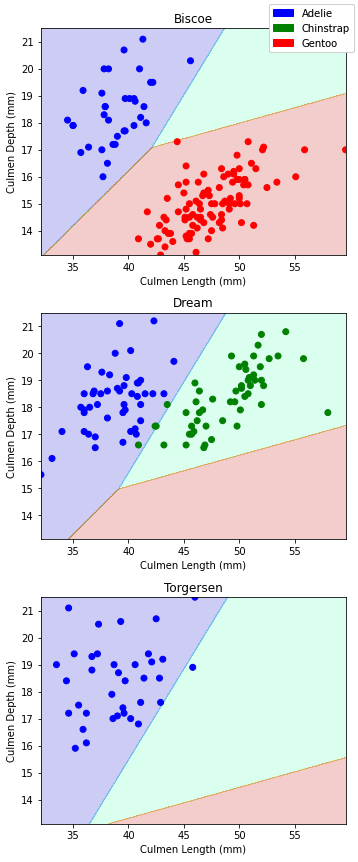

In [9]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(max_iter = 5000)

#creating a logistic regression and plotting the training data with the model
plot_regions(LR, X_train[cols], y_train)

We can see with the visual above, our Logistic Regression seems very effective. The dots line up very well with the decision regions displayed by our plots, and the model displays the training data. 

Logistic regression works by predicting a categorical dependent variable (species) by using a given set of parameters, which in this case, is culmen length, culmen depth, and island.

In [7]:
LR.fit(X_train[cols], y_train)
LR.score(X_train[cols], y_train)

0.9813432835820896

In [8]:
LR.score(X_test[cols], y_test)

0.9848484848484849

Our score for this model on the testing data is about 98% accuracy, which demonstrates that it is very effective.

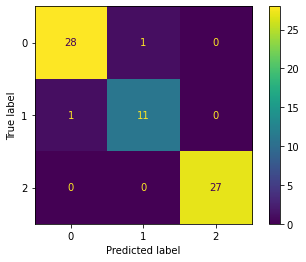

array([[28,  1,  0],
       [ 1, 11,  0],
       [ 0,  0, 27]])

In [16]:
confusionMatrix(X_test[cols], y_test, LR)

The confusion matrix for the logistic regression has high numbers on the diagonal, which shows that it had high accuracy. The 1s in the top middle and middle left box show that those were the mistakes, while the others were correct.

In [25]:
mistakes(X_test[cols], y_test, LR)

true: [0 1]
predicted: 
216    1
73     0
Name: Species, dtype: int64


This model made two mistakes in the testing data. It predicted the species wrong for an Adelie penguin, in which the model designated it as a chinstrap penguin. The second mistake was a chinstrap penguin, which the model designated as an Adelie penguin. This is most likely because these two penguins had culmen lengths and depths that were not close to the average of their species, which would explain why the model would place them under a different species.

## Model 2: Nearest Neighbors

**Picking Best Cross Validation Score**

0.9735849056603774


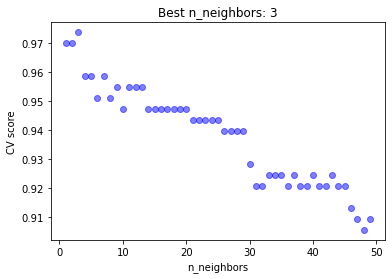

In [84]:
def crossValNC(X_train,y_train):
    """
    This function uses cross validation to choose the complexity parameters of the KNeighborsClassifier model
    Parameter X_train is the data frame holding the chosen columns used within the model
    Parameter y_train is the data frame representing the species in the training data
    """
    #import model and cross val
    from sklearn.model_selection import cross_val_score
    from sklearn.neighbors import KNeighborsClassifier 
    
    #create plot and initialize bestScore
    fig,ax = plt.subplots(1)
    bestScore = 0
    
    #test crossvalscores for n_neighbors: [1-50]
    for i in range(1,50):
        #Get cross val score and plot score
        neigh = KNeighborsClassifier(n_neighbors = i)
        score = cross_val_score(neigh,X_train,y_train, cv = 5).mean()
        ax.scatter(i,score,color = "bLue", alpha = 0.5)
        #Update best score if needed
        if score > bestScore:
                best_n_neighbors = i
                bestScore = score
        
    #set title and labels for graph              
    ax.set(title = "Best n_neighbors: " + str(best_n_neighbors),
          xlabel = "n_neighbors", ylabel = "CV score")
    print(bestScore)

crossValNC(X_train[cols], y_train)

**Decision Region Plots**

/Users/emmyxu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/emmyxu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/emmyxu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


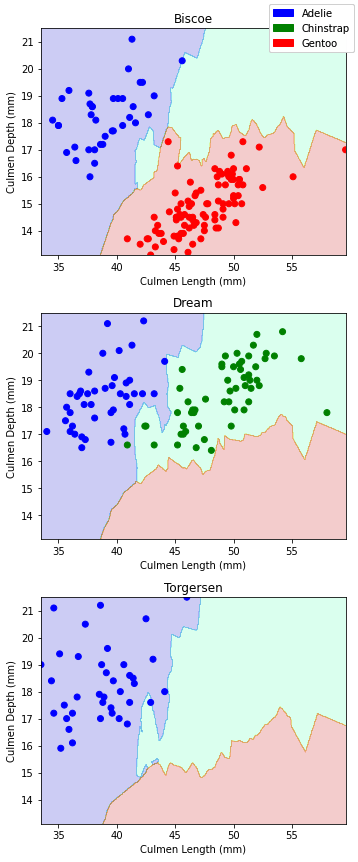

In [17]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 3)

#creating a Nearest Neighbors Classifier and plotting the training data with the model
plot_regions(neigh, X_train[cols], y_train)

The KNeighborsClassifier Model appears to be very accurate with a score of around 98.46%. The dots on the graph line up well with the decision regions disregarding one error with the Dream island graph. The models display the training data. 

In [7]:
neigh.fit(X_train[cols], y_train)
neigh.score(X_train[cols], y_train)

0.9814126394052045

In [8]:
neigh.score(X_test[cols], y_test)

0.9846153846153847

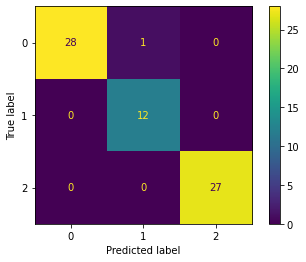

array([[28,  1,  0],
       [ 0, 12,  0],
       [ 0,  0, 27]])

In [20]:
confusionMatrix(X_test[cols], y_test, neigh)

The confusion matrix for the KNeighborsClassifier Model appears to be very accurate since the numbers on its diagonal are very high in comparison to the numbers elsewhere. There is a 1 in the first row and second column, indicating that there was one mistake.

In [24]:
mistakes(X_test[cols], y_test, neigh)

true: [1]
predicted: 
73    0
Name: Species, dtype: int64


This model made 1 mistake with the predictions, in which the model incorrectly predicted that a Dream island penguin that was actually a Chinstrap was an Adelie. The reason for this incorrect prediction is possibly due to the fact that this inaccurately predicted Chinstrap had culmen length and culmen depth that resembled an Adelie on the Dream island.

## Model 3: Support Vector Machines

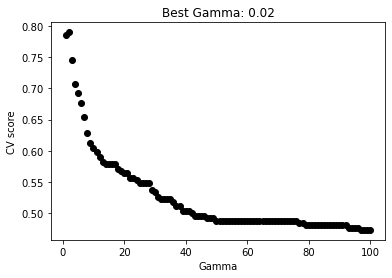

In [27]:
from sklearn import svm

def crossVal(X_train, y_train):
    """
    This function uses cross validation to choose the complexity parameters of the SVM model
    Parameter X_train is the data frame holding the chosen columns used within the model
    Parameter y_train is the data frame representing the species in the training data
    """
    
    from sklearn.model_selection import cross_val_score
    
    #initializing variables and plot
    fig, ax=plt.subplots(1)
    bestScore = 0
    bestGamma = 0
    
    #checking the cross validation score for gamma values between .01 and 1
    for i in range(1,101):
        S=svm.SVC(gamma=(i/100))
        cv_score = cross_val_score(S, X_train, y_train, cv=5).mean()
        ax.scatter(i, cv_score, color="black")
        #setting the best score
        if cv_score > bestScore:
            bestGamma = (i/100)
            bestScore = cv_score
    
    # set plot title and xlabels to display best gamma              
    ax.set(title="Best Gamma: "+ str(bestGamma),
          xlabel="Gamma", ylabel="CV score")

#calling the function on the training data to plot a visual to find the SVM best gamma value
crossVal(X_train[cols], y_train)

/Users/emmyxu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/emmyxu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/emmyxu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


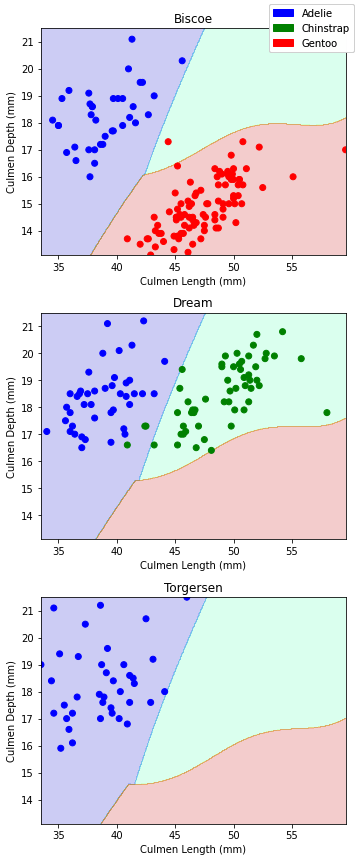

In [30]:
from sklearn import svm
SVM=svm.SVC(gamma = 0.02)

#creating a Support Vector Machines model and plotting the training data
plot_regions(SVM, X_train[cols], y_train)

Our SVM model seems very effective, it has a test score of 98.48%. The dots line up very well with the decision regions, with only a few deviations. In particular, the Torgersen plot only has Adelie penguins, which it should.

In [11]:
SVM.fit(X_train[cols], y_train)
SVM.score(X_train[cols], y_train)

0.9701492537313433

In [12]:
SVM.score(X_test[cols], y_test)

0.9848484848484849

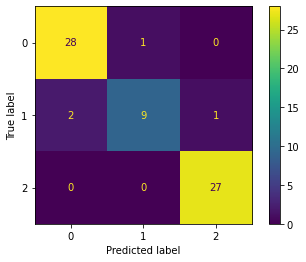

array([[28,  1,  0],
       [ 2,  9,  1],
       [ 0,  0, 27]])

In [33]:
confusionMatrix(X_test[cols], y_test, SVM)

In [34]:
mistakes(X_test[cols], y_test, SVM)

true: [0 0 1 2]
predicted: 
184    1
216    1
73     0
190    1
Name: Species, dtype: int64


The model made the most mistakes confusing Adelie penguins for Chinstrap penguins. Some of the Chinstrap penguins' measurements are probably very close to those typical of Adelie on Biscoe. The model most likely made errors because the SVM model doesn't perform as well when the target classes have a lot of overlap (more noise). As we can see in the decision regions plots, there's definitely overlap of some penguin species where the model doesn't typically expect to find them.

# Discussion

Overall, the models performed very well. They all had test scores of over 95% accuracy, all with under four mistakes. The Logistic Regression (LR) model had an accuracy score of 98.48%, the Nearest Neighbors (NN) model had an accuracy score of 98.46%, and the Support Vector Machines (SVM) model had an accuracy score of 98.48%. The variables we used were all pretty highly correlated, so that helped our model in predicting species.

The NN model works best when n_neighbors is 3, and the SVM model works best when gamma is 0.02, otherwise the model begins overfitting. To get the highest accuracy, we would suggest using the features "Culmen length" "Culmen Depth" and "Island" with the LR or SVM models, as these two had the best scores for the test data. The Logistic Regression model only had two errors, with a slightly higher score than the NearestNeighbors model, so it's the best model for this data.

The models could be improved if there were more data available presumably because then we would be able to see if the models we used were only accurate for this particular sample size of penguins. As an example, our very accurate Logistic Regression model may only be accurate for this set amount of penguins. Perhaps with more data, we would see that the decision regions would only be effective at predicting species for the cases documented within the dataframe. Or we may find out that for a more representative model of a bigger population, different complexity parameters for the different models may be more useful.